In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from numpy import exp
from scipy import stats
from datetime import datetime as dt    
from matplotlib import pyplot as plt   
from collections import Counter        

names = ["data/steam_reviews.csv",
         "data/steam_reviews_bonus_1.csv",
         "data/steam_reviews_bonus_2.csv"]

pd.set_option('display.float_format', lambda x: repr(x))

# RQ1 Exploratory Data Analysis (EDA)

Since the dataset is very large and to make a good exploring data analysis it is necessary to work with all columns, to answer the question RQ1 we will proceed by loading a sample of the complete dataset. Later on, when we answer the following questions, we will use the whole dataset.

In [2]:
import random

data = pd.concat([pd.read_csv(name, skiprows = lambda i: i>0 and random.random() > 0.3) for name in names],ignore_index = True)

In [3]:
#Let's first have a look at what kind of data we are dealing with
#data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11623923 entries, 0 to 11623922
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      float64
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       float64
 4   language                        object 
 5   review                          object 
 6   timestamp_created               float64
 7   timestamp_updated               float64
 8   recommended                     bool   
 9   votes_helpful                   float64
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  float64
 17  author.num_games_owned   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,...1
0,5.0,292030,The Witcher 3: Wild Hunt,85184171.0,english,"good story, good graphics. lots to do.",1611379264.0,1611379264.0,True,0.0,...,False,False,7.656119817019354e+16,11,1.0,823.0,823.0,823.0,1611379201.0,NaN
1,9.0,292030,The Witcher 3: Wild Hunt,85182785.0,spanish,great game,1611377005.0,1611377005.0,True,0.0,...,False,False,7.656119830172411e+16,38,5.0,2399.0,333.0,2364.0,1611379080.0,NaN
2,10.0,292030,The Witcher 3: Wild Hunt,85182697.0,schinese,神作！不bb,1611376831.0,1611376831.0,True,0.0,...,False,False,7.656119908920958e+16,29,1.0,5368.0,1471.0,5368.0,1611371665.0,NaN
3,12.0,292030,The Witcher 3: Wild Hunt,85182067.0,schinese,"什么?你儿子失踪了?什么?这栋房子闹鬼?什么?你猜到我要玩""来句昆特牌""的梗?\n抱歉这个梗...",1611375772.0,1611375772.0,True,0.0,...,False,False,7.656119834894158e+16,20,1.0,6598.0,29.0,6598.0,1610715923.0,NaN
4,18.0,292030,The Witcher 3: Wild Hunt,85180436.0,english,favorite game of all time cant wait for the Ne...,1611373086.0,1611373086.0,True,0.0,...,False,False,7.656119806559152e+16,33,1.0,23329.0,177.0,23329.0,1611219011.0,NaN


In [4]:
#And let's see if we have any duplicated row
index=0
for i in data.duplicated():
    if i==True: print(index, "is duplicated")
    index+=1
    

In [5]:
#this is just to have an idea of how big every column of our dataset is
data.memory_usage( )

Index                                  128
Unnamed: 0                        92991384
app_id                            92991384
app_name                          92991384
review_id                         92991384
language                          92991384
review                            92991384
timestamp_created                 92991384
timestamp_updated                 92991384
recommended                       11623923
votes_helpful                     92991384
votes_funny                       92991384
weighted_vote_score               92991384
comment_count                     92991384
steam_purchase                    11623923
received_for_free                 11623923
written_during_early_access       11623923
author.steamid                    92991384
author.num_games_owned            92991384
author.num_reviews                92991384
author.playtime_forever           92991384
author.playtime_last_two_weeks    92991384
author.playtime_at_review         92991384
author.last

In [6]:
#the following command allows us to check wheter there are 
#null values or not (and in case fix those)
data.isnull().sum()

Unnamed: 0                        5100480
app_id                                  0
app_name                                0
review_id                               0
language                                0
review                              18569
timestamp_created                       0
timestamp_updated                       0
recommended                             0
votes_helpful                           0
votes_funny                             0
weighted_vote_score                     0
comment_count                           0
steam_purchase                          0
received_for_free                       0
written_during_early_access             0
author.steamid                          0
author.num_games_owned                  0
author.num_reviews                      0
author.playtime_forever                 2
author.playtime_last_two_weeks          2
author.playtime_at_review           13647
author.last_played                      1
...1                              

<AxesSubplot:>

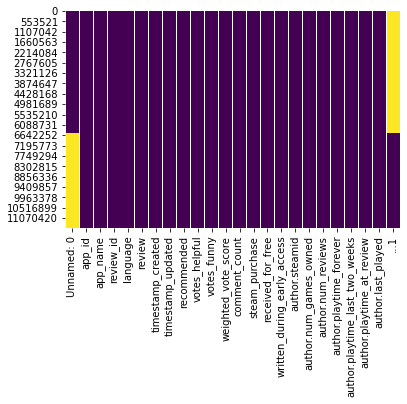

In [7]:
#let's visually see how many null values are there
sns.heatmap(data.isnull(),cbar = False,cmap = 'viridis')

<AxesSubplot:>

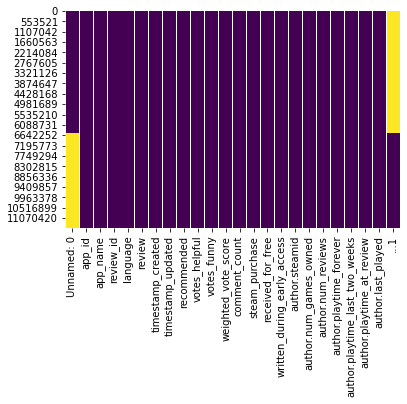

In [8]:
#Replace null values with mean of the column
data["author.playtime_at_review"]=pd.to_numeric(data["author.playtime_at_review"])
data["author.playtime_at_review"].fillna(data["author.playtime_at_review"].mean(), inplace=True)

sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

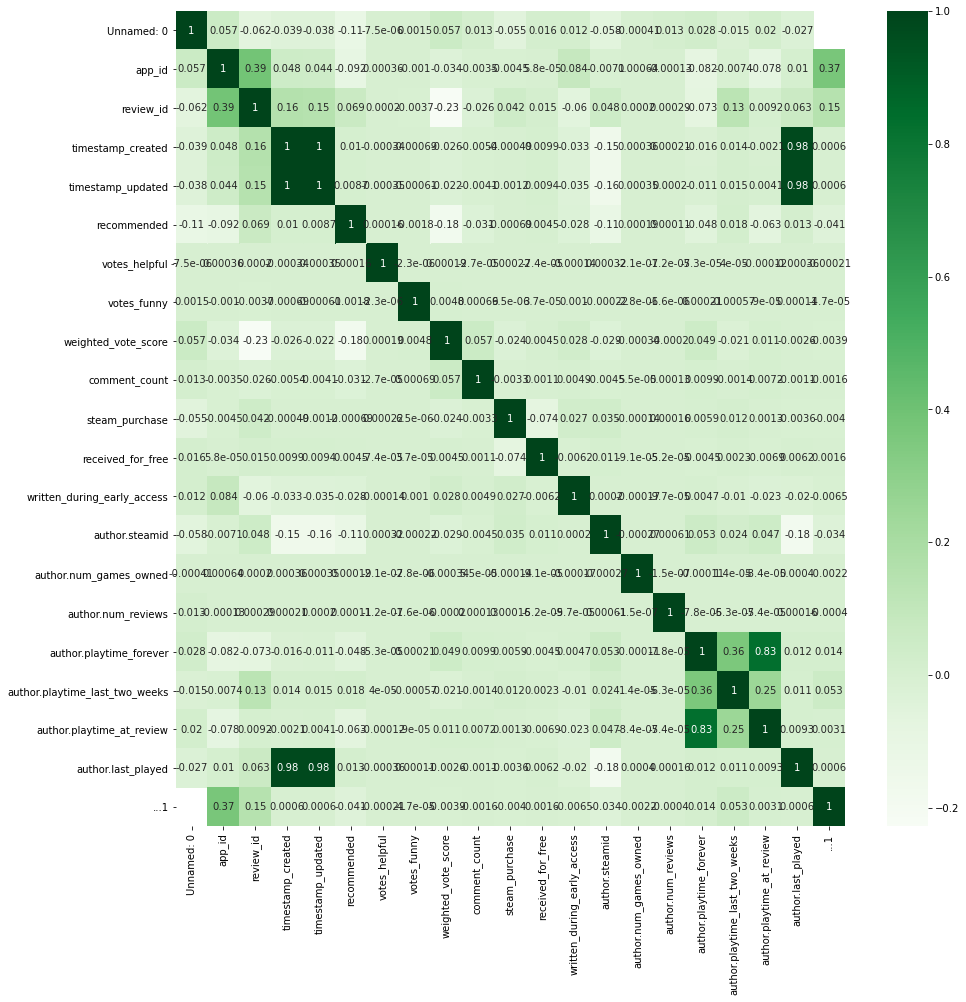

In [9]:
#Visualize how related are the entries
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),cbar = True,annot=True,cmap='Greens')

Text(0, 0.5, 'timestamp_updated')

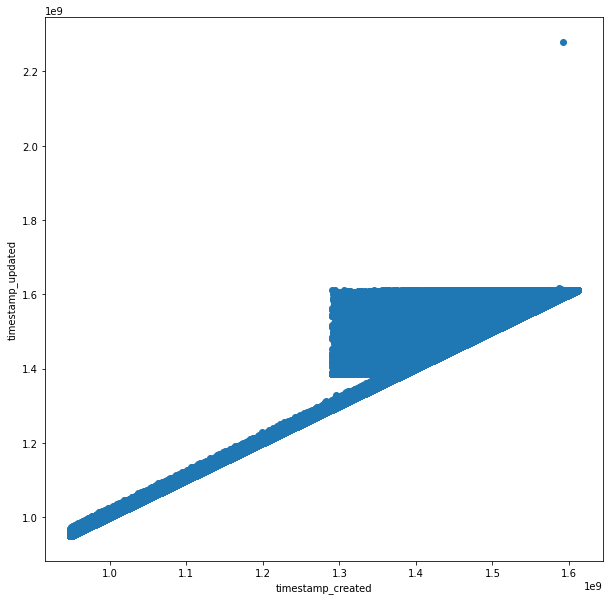

In [10]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=data)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

## Plot the number of reviews for each application in descending order

In [11]:
#Here we just handle the data in order to plot it in the following cell
col = ["app_name","review","weighted_vote_score"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

In [12]:
s = data.dropna(how = 'any',axis = 0) 
s = s["app_name"].value_counts()
percent = 1/100*data.shape[0]
s = s.groupby(np.where(s >= percent,s.index, 'other games' )).sum()
s = s.sort_values(axis = 0, ascending = False, ignore_index = False)

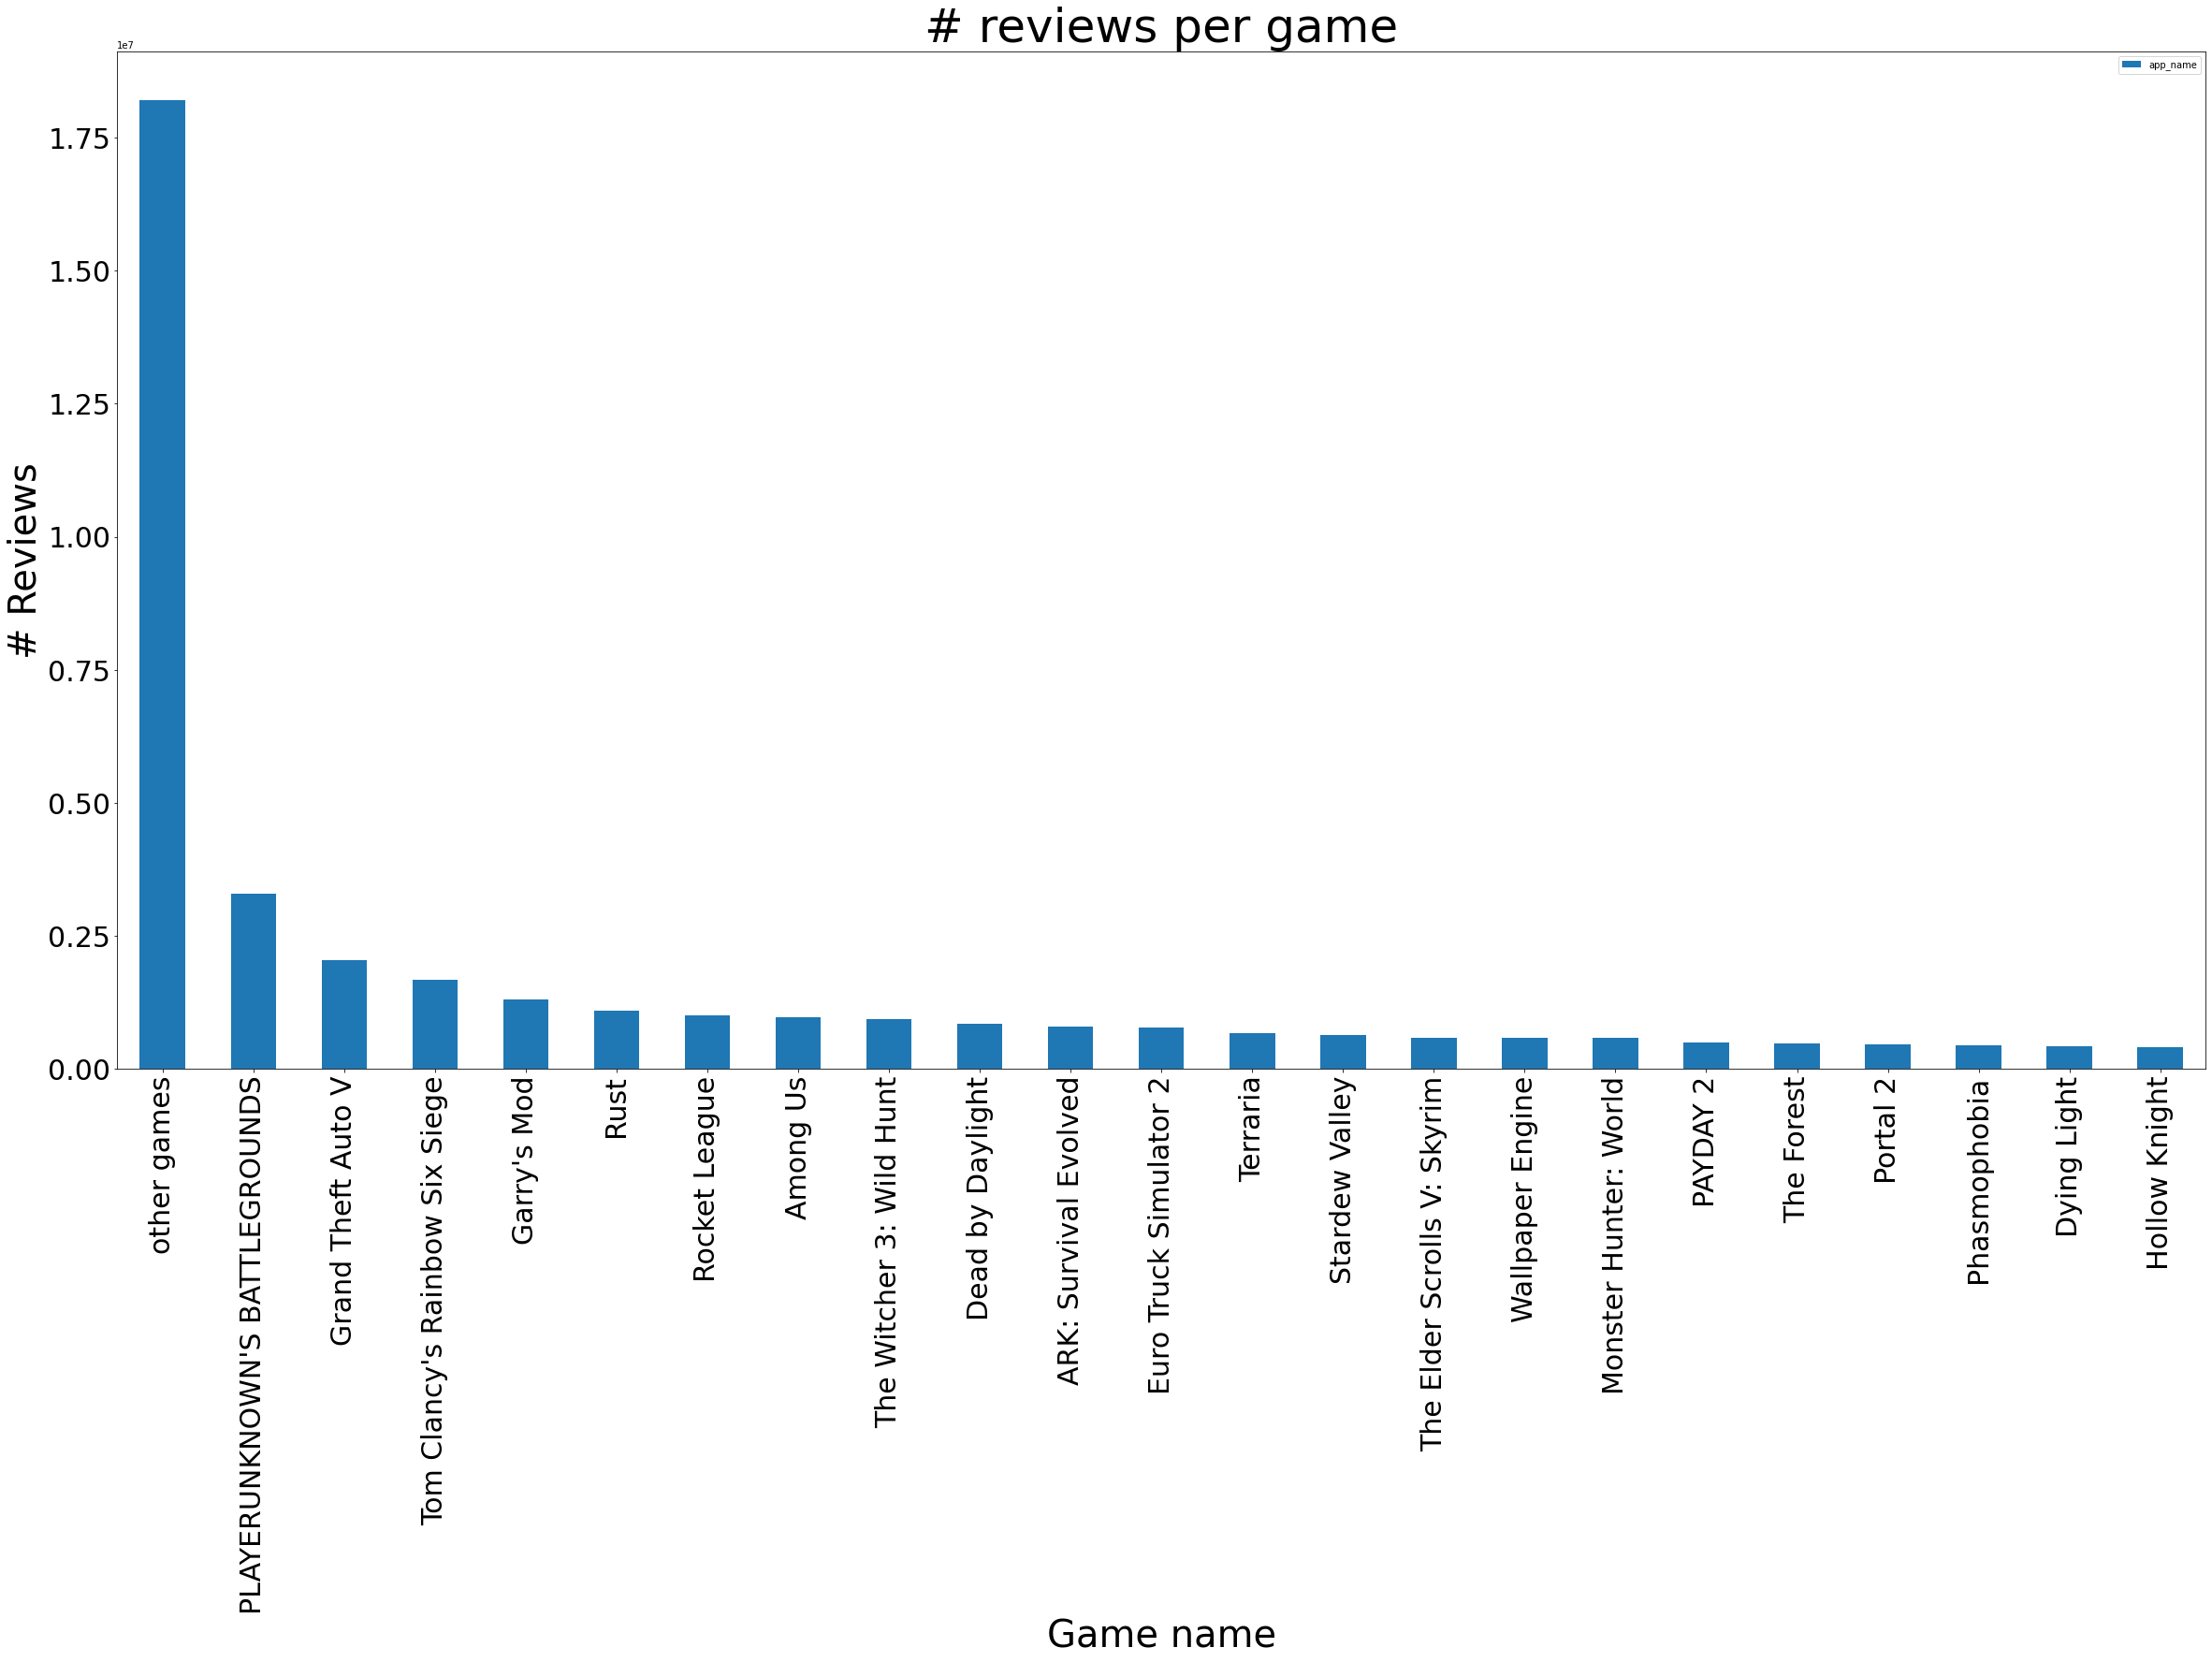

In [13]:
#We opted for grouping all the games with a low number of reviews into a single column
ax = s.plot(kind = 'bar', figsize = (40,20), legend = True, fontsize = 30)
ax.set_xlabel("Game name", fontsize = 40)
ax.set_ylabel("# Reviews", fontsize = 40)
plt.title("# reviews per game", fontsize = 50)
plt.show()

## What applications have the best Weighted Vote Score?

In [14]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [15]:
#Here we just pick the 10 games with the highest absolute score
data[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
5571634,Stardew Valley,0.995986759662628
27319005,Stardew Valley,0.995986759662628
10626081,Divinity: Original Sin 2,0.9952450394630432
32373453,Divinity: Original Sin 2,0.995245039463043
24101266,Subnautica,0.994453251361847
2353895,Subnautica,0.9944532513618468
9375898,Mirror,0.9940375089645384
31123269,Mirror,0.994037508964538
4599864,Wallpaper Engine,0.99353951215744
26347235,Wallpaper Engine,0.99353951215744


In [16]:
#MEAN METHOD 
app_vote_mean = data[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score").round(3)

,weighted_vote_score
app_name,
Hunt Down The Freeman,0.502
Urban Empire,0.439
METAL GEAR SURVIVE,0.422
Identity,0.415
Umbrella Corps,0.415
Torment: Tides of Numenera,0.411
BERSERK and the Band of the Hawk,0.397
DRAGON QUEST HEROES™ II,0.381
X Rebirth,0.38


## Which applications have the most and the least recommendations? How many of these applications were purchased, and how many were given for free?

In [17]:
#the 2 questions are done together let's first reduce our dataset to the columns needed
col = ["app_name","recommended","steam_purchase", "received_for_free"]
rec = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

In [18]:
#now let's group the reviews by game name ("app_name")
rec_count = rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,6698,6046,187
<U+4E09><U+56FD><U+7FA4><U+82F1><U+4F20>8 Heroes of the Three Kingdoms 8,4677,6487,244
A Hat in Time,68636,54728,1941
A Short Hike,11594,9106,260
A Way Out,19532,15963,640
...,...,...,...
XCOM 2,52732,42215,1254
Yakuza 0,29774,24643,466
Youtubers Life,9566,11437,544


<AxesSubplot:xlabel='app_name'>

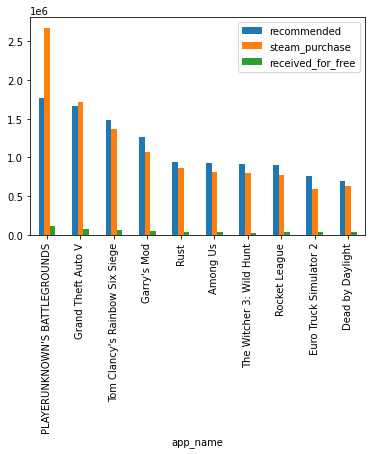

In [19]:
#Plot the ones with the highest number of recommendations
most_rec = rec_count.nlargest(10, "recommended")
most_rec.plot(kind = 'bar')

<AxesSubplot:xlabel='app_name'>

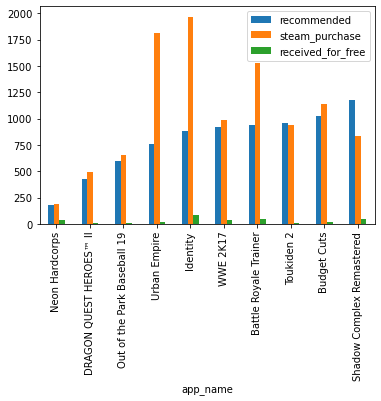

In [20]:
#Plot the ones with the lowest number of recommendations
least_rec = rec_count.nsmallest(10, "recommended")
least_rec.plot(kind = 'bar')

We decided to use bar plots in order to view the data because in this particular case they can summarise all the info we care about and make it readable right away.

In [21]:
del s
del rec

# RQ3 

## What is the most common time the authors review an application?

In [22]:
col = ["timestamp_created"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

#convert all timestamp datas in dates and get only time
timestamp = [x for x in data.timestamp_created if not pd.isnull(x)]
t = [dt.fromtimestamp(x).time() for x in timestamp]
#count occurances
most_common_time = Counter(t).most_common(1)[0]

print("\nThe most common time of reviews is:", most_common_time[0],"with", most_common_time[1], "occurances.\n")


The most common time of reviews is: 16:54:53 with 807 occurances.



In [24]:
def reviewPerIntervals(interval): #plot the number of reviews for each of the intervals in times
    #get hour from our time_datas
    h = [x.hour for x in t]
    #create the intervals of time
    trange = [dt.strptime(x[:][0],"%H:%M:%S").hour for x in intervals]
    #add the las interval of time manually otherwise we miss to count the review between 20-24
    trange.append(24)
    trange = sorted(trange)
    #create the bin to count and plot the occurances in each interval
    count = pd.cut(h, trange)
    #plot the result
    count.value_counts().plot(kind='bar',rot = 0, color = "b" )
    plt.xlabel('Time intervals')
    plt.ylabel('Number of reviews')

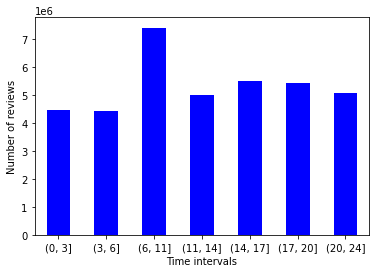

In [25]:
#plot the number of reviews in each given interval
intervals = [["06:00:00","10:59:59"],
             ["11:00:00","13:59:59"],
             ["14:00:00","16:59:59"],
             ["17:00:00","19:59:59"],
             ["20:00:00","23:59:59"],
             ["00:00:00","02:59:59"],
             ["03:00:00","05:59:59"]]

reviewPerIntervals(intervals)

In [26]:
del t
del timestamp

# RQ4

## What are the top 3 languages used to review applications?

In [27]:
col =  ["language","votes_helpful","votes_funny"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

languages = data.language
#get the 3 most used languages
most_common_len = Counter(languages).most_common(3)

print("\nThe most common languages used to review applications are:\n",
     "-",most_common_len[0][0],"with", most_common_len[0][1], "occurances\n",
     "-",most_common_len[1][0],"with", most_common_len[1][1], "occurances\n",
     "-",most_common_len[2][0],"with", most_common_len[2][1], "occurances\n",)


The most common languages used to review applications are:
 - english with 17024059 occurances
 - schinese with 6839502 occurances
 - russian with 4168323 occurances



In [28]:
def languageFilter(data, languages):
    return data[data.language.isin(languages)]

## How many of them were voted as funny?

In [29]:
top3 = [most_common_len[0][0],most_common_len[1][0],most_common_len[2][0]]

#filtering data in order to get reviews in specific languages
top3df = languageFilter(data, top3)
#get the percentage of funny reviews
perc_f = len(top3df[top3df.votes_funny > 0])/len(top3df)

print("\nThe", round(perc_f*100,2),"% of the reviews were voted as funny.")


The 11.81 % of the reviews were voted as funny.


## How many of them were voted as helpful?


In [30]:
#get the percentage of helpful reviews
perc_h = len(top3df[top3df.votes_helpful > 0])/len(top3df)

print("\nThe", round(perc_h*100,2),"% of the reviews were voted as helpful.")


The 28.13 % of the reviews were voted as helpful.


In [31]:
del top3df
del languages

# RQ5


## Top 10 most popular rewievers based on the number of reviews made

In [32]:
pd.set_option('display.float_format', lambda x: "%d" %x)
col = ["author.num_reviews","author.steamid","steam_purchase","received_for_free","recommended","app_name"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

top10 = data.sort_values(by = "author.num_reviews", ascending = False)

In [33]:
top10[["author.steamid", "author.num_reviews"]].drop_duplicates(keep = 'first', ignore_index = True)[:10]

,author.steamid,author.num_reviews
0,76561200000000000,4398047000000
1,76561198103272000,4398046511108
2,76561198848008160,4398046511105
3,76561197873406848,4398046511105
4,76561198125392512,5236
5,76561197960239216,5236
6,76561197903451840,5236
7,76561197911400560,5236
8,76561197909896016,5236
9,76561197891489728,5236


## Application reviewed by the most popular author:

In [34]:
#looking for the most popular author based on the number of reviews done
most_popular = data[data["author.num_reviews"] == data["author.num_reviews"].max()]
#memorizing the steamid of the most popular author
author_id = int(most_popular["author.steamid"])

games = data[data["author.steamid"] == author_id].app_name
print(*list(games.drop_duplicates()), sep = "\n")

Don't Starve
Rocket League
Papers, Please
Senren*Banka
GRIS
DUSK
Outlast
The Elder Scrolls V: Skyrim
The Room
FTL: Faster Than Light
There Is No Game: Wrong Dimension
Dying Light
American Truck Simulator
Saints Row: The Third
STAR WARS� Empire at War: Gold Pack
Ori and the Will of the Wisps
BeamNG.drive
The Room Two
Age of Empires II (2013)
Ravenfield
Super Hexagon
BioShock Infinite
Just Shapes & Beats
DOOM
Black Mesa
Finding Paradise
Tabletop Simulator
Keep Talking and Nobody Explodes
Duck Game
STEINS;GATE
Danganronpa: Trigger Happy Havoc
Mark of the Ninja
Phoenix Wright: Ace Attorney Trilogy
Batman: Arkham Asylum GOTY Edition
Gunpoint
The Binding of Isaac
Danganronpa 2: Goodbye Despair
HuniePop
Grimm's Hollow
Grand Theft Auto V
PLAYERUNKNOWN'S BATTLEGROUNDS
Monster Hunter: World
The Elder Scrolls Online
Total War: WARHAMMER II
Cities: Skylines
Assassin's Creed Origins
Stellaris
Black Desert Online
Kingdom Come: Deliverance
Jurassic World Evolution
ARK: Survival Evolved
No Man's Sky
S

## Applications purchased and got for free by the most popular author

In [35]:
purch = data[data["author.steamid"] == author_id]
count_purchase = 0
count_free = 0
total = 0

#iterate the purch DataFrame created to check if the games where purchased or not
for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        count_purchase += 1
    if(row["received_for_free"]):
        count_free += 1
    total += 1

#using the total number of games, i will calculate the percentage for the values
perc_purch = (count_purchase/total)*100
perc_free = (count_free/total)*100

print("The number of games PURCHASED by the most popular author is:\t", str(count_purchase),"[in percentage:", round(perc_purch, 2),"%]"
      "\nInstead, the number of games he RECEIVED FOR FREE is:\t\t", str(count_free), "[in percentage:", round(perc_free, 2),"%]")

The number of games PURCHASED by the most popular author is:	 4966391 [in percentage: 79.51 %]
Instead, the number of games he RECEIVED FOR FREE is:		 177318 [in percentage: 2.84 %]


## Number of positive and negatives reviews for both games purchased and got for free

In [36]:
#using the iterator as in the last cell, we will check and count every review and store the results in different variables
p_purch = 0
n_purch = 0
tot_purch = 0

p_free = 0
n_free = 0
tot_free = 0

for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        if(row["recommended"]): p_purch += 1
        else: n_purch += 1
        tot_purch += 1
    if(row["received_for_free"]):
        if(row["recommended"]): p_free += 1
        else: n_free += 1
        tot_free += 1

if tot_purch == 0: tot_purch = 0
perc_purch_p = (p_purch/tot_purch)*100
perc_purch_n = (n_purch/tot_purch)*100

if tot_free == 0: tot_free = 1
perc_free_p = (p_free/tot_free)*100
perc_free_n = (n_free/tot_free)*100

print("PURCHASED:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_purch), "[in percentage:", round(perc_purch_p, 2) ,"%]"
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_purch), "[in percentage:", round(perc_purch_n, 2) ,"%]")
print("\nRECEIVED FOR FREE:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_free), "[in percentage:", round(perc_free_p, 2) ,"%]",
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_free), "[in percentage:", round(perc_free_n, 2) ,"%]")

PURCHASED: 
	The number of POSITIVE (recommended) games is:		 3906290 [in percentage: 78.65 %]
	The number of NEGATIVE (not recommended) games is:	 1060101 [in percentage: 21.35 %]

RECEIVED FOR FREE: 
	The number of POSITIVE (recommended) games is:		 139592 [in percentage: 78.72 %] 
	The number of NEGATIVE (not recommended) games is:	 37726 [in percentage: 21.28 %]


# RQ6

## Average time a user lets pass before updating a review

In [37]:
import time

col = ["timestamp_created","timestamp_updated","author.steamid"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

created_timestamp = [x for x in data.timestamp_created if not pd.isnull(x)]
updated_timestamp = [x for x in data.timestamp_updated if not pd.isnull(x)]

In [38]:
comb = zip(created_timestamp, updated_timestamp)
diff = []

for c, u in comb:
    if (c != u):
        diff.append(u-c)

In [39]:
mean = 0
for i in diff:
    mean += i
mean = mean//len(diff)
day = mean // (24 * 3600)
mean = mean % (24 * 3600)
hour = mean // 3600
mean %= 3600
minute = mean // 60
minute += hour*60

print("\nThe average time a user lets pass before updating a review is:", day, "days and", minute, "minutes")


The average time a user lets pass before updating a review is: 183.0 days and 1392.0 minutes


## Top 3 authors that usually update their reviews

In [40]:
up = data[data["timestamp_created"] != data["timestamp_updated"]]

In [41]:
#The authors with most updated reviews, and the number of times they updated a review
out = up["author.steamid"].value_counts().nlargest(n = 3, keep = 'first')
out

76561200000000000    1249037
76561198192166880         95
76561198206999968         63
Name: author.steamid, dtype: int64

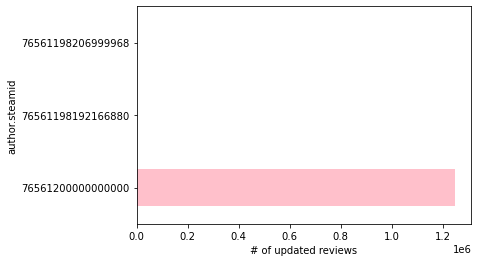

In [42]:
#plot the result
out.plot.barh(color = "pink")
plt.ylabel("author.steamid")
plt.xlabel("# of updated reviews")
plt.yticks(np.arange(3), list(map(int,out.index)) )
plt.show()

In [43]:
del out
del up
del comb
del created_timestamp
del updated_timestamp

# RQ7

## What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

To calculate the probability that a review has a weighted vote score greater than or equal to 0.5, we will use the classic definition of probability, favorable cases over possible cases.

In [44]:
pd.set_option('display.float_format', lambda x: repr(x))
col = ["weighted_vote_score","votes_funny"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

prob = len(data[data.weighted_vote_score >= 0.5]) / len(data.weighted_vote_score)
print("\nThe probability is equal to:", round(prob,3))


The probability is equal to: 0.218


## What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

To calculate the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5, we will use the definition of Conditional probability:

$$\mathbb{P}(A|B)=\frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}$$

$A$ = "the review has at least one vote as funny" 


$B$ = "the Weighted Vote Score is bigger than 0.5"

In [45]:
pB = len(data[data.weighted_vote_score > 0.5]) / len(data.weighted_vote_score)
B = data[data.weighted_vote_score > 0.5]
pAB = len(B[B.votes_funny > 0]) / len(data)

print("\nThe probability is equal to:", round(pAB/pB,3))


The probability is equal to: 0.191


## Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

To say if the two probabilities are independent we will use the definition:

$$\mathbb{P}(A\cap B)=\mathbb{P}(A)\mathbb{P}(B)$$

So if this definition is true we can say that the event “a review has at least one vote as funny” and the event “a review has a Weighted Vote Score equal or bigger than 0.5” are indipendent, otherwise they are dipendent.

In [46]:
pA = len(data[data.votes_funny > 0]) / len(data.weighted_vote_score)

if pA*pB == pAB:
    print("\nThe events are indipendent!")
else:
    print("\nThe events are dipendent!")


The events are dipendent!


In [47]:
del B

# RQ8


## Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

In [48]:
col = ["weighted_vote_score","language","timestamp_created","timestamp_updated"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

#filtering the dataset
Russia = data[data['language']=='russian'].weighted_vote_score
China = data[data['language']=='schinese'].weighted_vote_score

#let's have a first look at mean and variance
print("\nThe Russian mean is :",round(np.mean(Russia),3))
print("The Chinese mean is :",round(np.mean(China),3))
print("\nThe Russian variance is :",round(np.var(Russia),3))
print("The Chinese variance is :",round(np.var(China),3))


The Russian mean is : 0.212
The Chinese mean is : 0.141

The Russian variance is : 0.066
The Chinese variance is : 0.056


Now that we’ve taken a first look at the mean and the variance of the two populations, we can run a t-test to determine if the two sets are significantly different from each other.

In [49]:
#t-test
ttest = stats.ttest_ind(Russia, China, equal_var=False)
print("\nThe p-valuee of the t-test is:",ttest.pvalue)


The p-valuee of the t-test is: 0.0


As you might expect the p-value of the t-test is very low so the difference in the group is remarkable so the two populations are different.

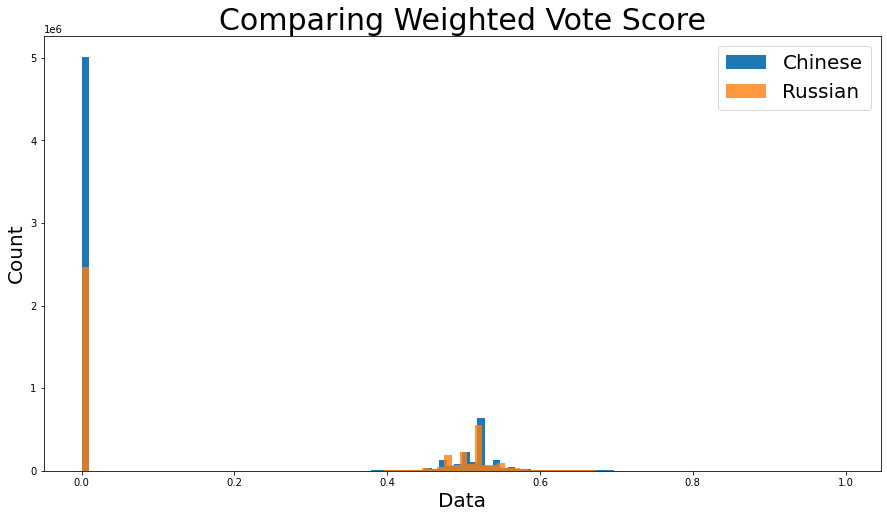

In [50]:
#a look of the distribution of the votes for each istance
plt.figure(figsize = (15,8))
plt.hist(China, bins = 100, alpha = 1, label = "Chinese")
plt.hist(Russia, bins = 100, alpha = 0.8, label = "Russian")

plt.xlabel("Data", size = 20)
plt.ylabel("Count", size = 20)
plt.title("Comparing Weighted Vote Score", size=30)
plt.legend(loc='upper right',fontsize = 20)
plt.show()

In [51]:
del China
del Russia

## Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

In [52]:
#as before, reduce our dataset with just the entries we need
col = ["timestamp_created","timestamp_updated","weighted_vote_score","recommended"]
tab = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

In [53]:
#we observe that there are many rows with weight 0, we want to remove those
tab = tab[tab.weighted_vote_score != 0]
tab

,timestamp_created,timestamp_updated,recommended,weighted_vote_score
23,1611370535.0,1611370535.0,True,0.523809552192688
27,1611368730.0,1611379495.0,True,0.7842262387275696
29,1611368498.0,1611368498.0,True,0.523809552192688
33,1611366821.0,1611366821.0,False,0.4014598727226257
64,1611353775.0,1611353775.0,True,0.52173912525177
...,...,...,...,...
38747351,1185916039.0,1185916039.0,False,0.4982964
38747360,1114916638.0,1124580377.0,True,0.5402299
38747366,1528486834.0,1528486834.0,True,0.4761905
38747368,1545249119.0,1545249119.0,True,0.631274


Now it's time to convert the 2 timestamp columns into a readable way and do
$\text{timestamp_updated} - \text{timestamp_created}$ (it's the variable we care about!)

In [54]:
tab = tab.assign(timestamp_diff = (tab.timestamp_updated-tab.timestamp_created)*1/(60*60*24)) #convert to days unit of meaasure
tab = tab.drop(columns = ['timestamp_updated', 'timestamp_created'])

In [55]:
tab #We made it!

,recommended,weighted_vote_score,timestamp_diff
23,True,0.523809552192688,0.0
27,True,0.7842262387275696,0.1245949074074074
29,True,0.523809552192688,0.0
33,False,0.4014598727226257,0.0
64,True,0.52173912525177,0.0
...,...,...,...
38747351,False,0.4982964,0.0
38747360,True,0.5402299,111.84883101851852
38747366,True,0.4761905,0.0
38747368,True,0.631274,0.0


Text(0, 0.5, 'time diff [days]')

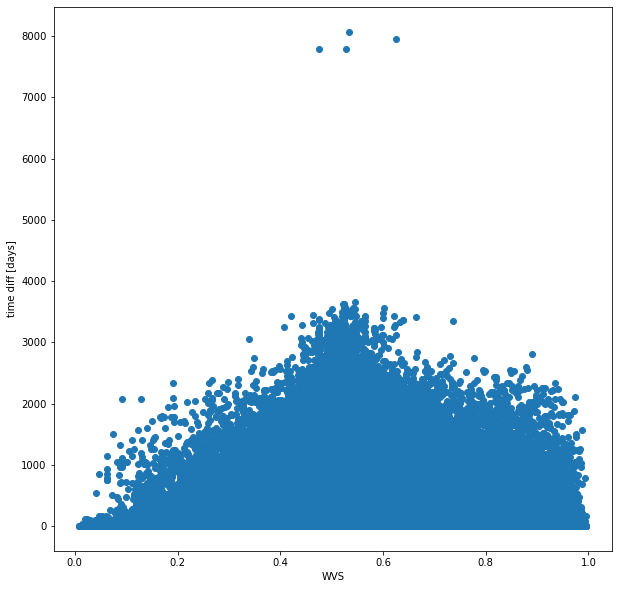

In [56]:
#it's time to plot and see what we have here before we start working on this data
plt.figure(figsize = (10,10))
plt.scatter(x = 'weighted_vote_score',y = 'timestamp_diff',data = tab)
plt.xlabel('WVS')
plt.ylabel('time diff [days]')

Looking at the structure of our data we can already suppose that there is no linear relation between the weighted vote score and the 
time that a user lets pass before he updates the review, but let's check that

In [57]:
x = tab["weighted_vote_score"]
y = tab["timestamp_diff"]

#Pearson test
correlation = stats.pearsonr(x,y)
print("Pearson's correlation coefficent is:", round(correlation[0],4))

Pearson's correlation coefficent is: 0.0148


Since the coefficent obtained is very low, we can assert that there is no linear correlation between the time that a user lets pass before he updates the review and the weighted vote score.
But there might be a higher degree correlation, we can check that by running some fits on our data

In [58]:
#In this cell we define all the functions we need to run fits on our data
from scipy.stats import t

def tt(x,n):
    return t.pdf(x,n)
def gaus(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def poli(x,a,b,c):
    return a+b*x+c*x*x
def line(x,a,b):
    return a+b*x

In [59]:
#Here we compute the parameters for the fit
param_t, param_cov_t = curve_fit(tt, x, y) #Student T
param_g, param_cov_g = curve_fit(gaus,x,y) #Gaussian
param_p, param_cov_p = curve_fit(poli,x,y) #Poly of order 2

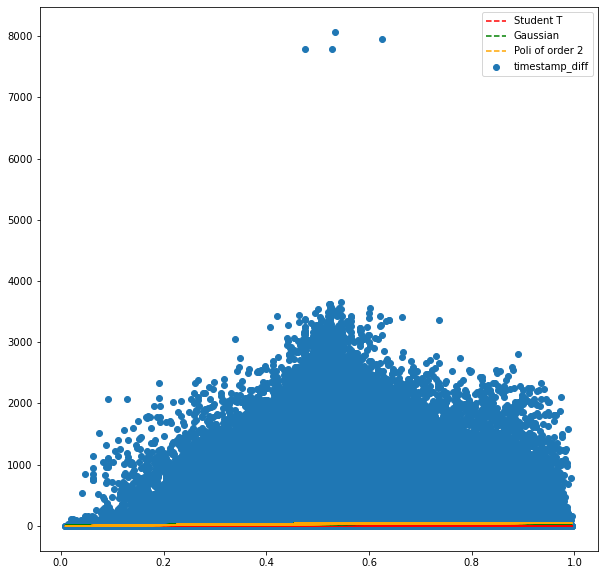

In [60]:
# ans stores the new y-data according to
# the coefficients given by curve-fit() function
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (10,10))

ans_t = t.pdf(x,param_t[0])
plt.plot(x, ans_t, '--', color ='red', label ="Student T")

ans_g = param_g[0]*exp(-(x-param_g[1])**2/(2*param_g[2]**2))
plt.plot(x, ans_g, '--', color ='green', label ="Gaussian")

ans_p = param_p[0]+param_p[1]*x+param_p[2]*x**2
plt.plot(x, ans_p, '--', color = 'orange', label ="Poli of order 2")

plt.scatter(x = 'weighted_vote_score',y = 'timestamp_diff',data=tab)

plt.legend()
plt.show()

Regardless of the function we use for our fit we are always obtaining very similar results, hence the variables we are taking into consideration are probably not correlated at all.

## Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [61]:
#let's first split the data in 2 dataframes: one with true values for the recommendation
#and one with false values
tabT = tab[tab.recommended != False]
tabF = tab[tab.recommended == False]

del tab
#now let's plot the 2 (sub)dataset we have

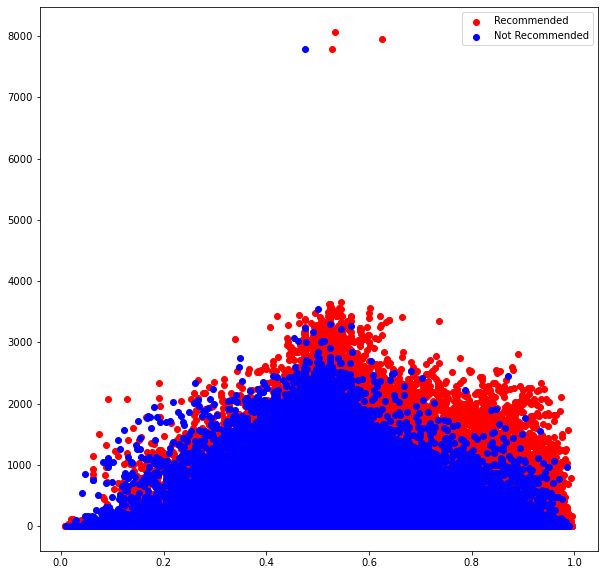

In [62]:
plt.figure(figsize=(10,10))
 
ax1=plt.scatter(x = 'weighted_vote_score', y = 'timestamp_diff', data=tabT, color = "red")

ax2=plt.scatter(x = 'weighted_vote_score', y = 'timestamp_diff', data=tabF, color = "blue")

plt.legend([ax1,ax2],["Recommended","Not Recommended"])
plt.show()

At first sight they still look like before but let's run some test on them before giving a judgement

In [63]:
#as usual, reassigning columns to make the code more readable
xT, yT = tabT['weighted_vote_score'],tabT['timestamp_diff']
xF, yF = tabF['weighted_vote_score'],tabF['timestamp_diff']

#Pearson test
corrT = stats.pearsonr(tabT['weighted_vote_score'],tabT['timestamp_diff'])
corrF = stats.pearsonr(tabF['weighted_vote_score'],tabF['timestamp_diff'])

print("Pearson's correlation coefficent for the Recommended set of data is:",round(corrT[0],4))
print("Pearson's correlation coefficent for the not Recommended set of data is:",round(corrF[0],4))

Pearson's correlation coefficent for the Recommended set of data is: 0.0039
Pearson's correlation coefficent for the not Recommended set of data is: 0.0405


For both cases we still get no linear correlation between the time a user waits to update the review and the weighted vote score. \
Let's try with fitting method as well:

In [64]:
#Run fits to see if we have a higher 
param_tT, param_cov_tT = curve_fit(tt, xT, yT)
param_gT, param_cov_gT = curve_fit(gaus,xT,yT)
param_pT, param_cov_pT = curve_fit(poli,xT,yT)

param_tF, param_cov_tF = curve_fit(tt, xF, yF)
param_gF, param_cov_gF = curve_fit(gaus,xF,yF)
param_pF, param_cov_pF = curve_fit(poli,xF,yF)

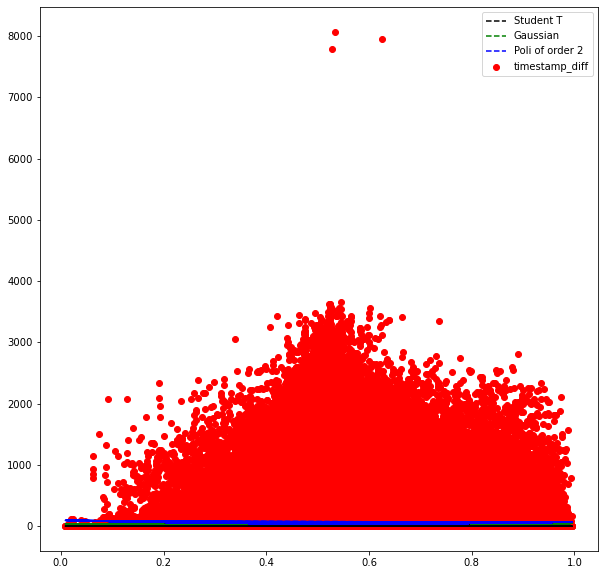

In [65]:
#plot everything
plt.figure(figsize=(10,10))

ans_tT = t.pdf(xT,param_tT[0])
plt.plot(xT, ans_tT, '--', color = 'black', label = "Student T")

ans_gT = param_gT[0]*exp(-(xT-param_gT[1])**2/(2*param_gT[2]**2))
plt.plot(xT, ans_gT, '--', color ='green', label ="Gaussian")

ans_pT = param_pT[0]+param_pT[1]*xT+param_pT[2]*xT**2
plt.plot(xT, ans_pT, '--', color ='blue', label = "Poli of order 2")


plt.scatter(x = 'weighted_vote_score',y = 'timestamp_diff',data = tabT, color = "red")

plt.legend()
plt.show()

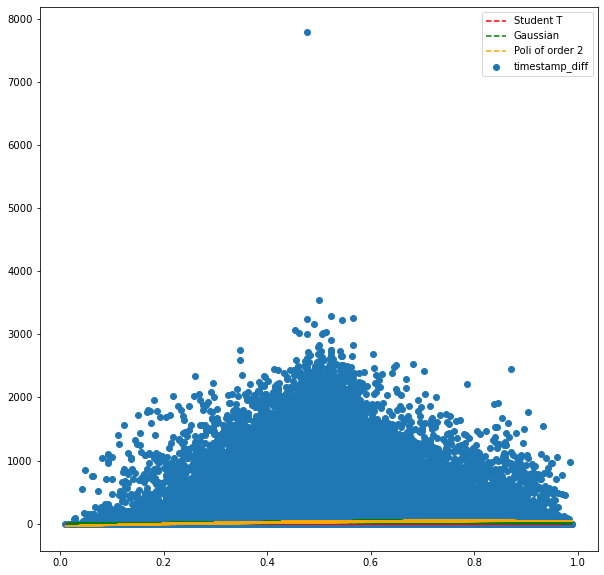

In [66]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize = (10,10))

ans_tF = t.pdf(xF,param_tF[0])
plt.plot(xF, ans_tF, '--', color ='red', label ="Student T")

ans_gF = param_gF[0]*exp(-(xF-param_gF[1])**2/(2*param_gF[2]**2))
plt.plot(xF, ans_gF, '--', color ='green', label ="Gaussian")

ans_pF = param_pF[0]+param_pF[1]*xF+param_pF[2]*xF**2
plt.plot(xF, ans_pF, '--', color ='orange', label = "Poli of order 2")

plt.scatter(x = 'weighted_vote_score',y = 'timestamp_diff',data = tabF)

plt.legend()
plt.show()

Results show that also in this case (considering wheter the review were recommended or not) there is no real degree of correlation between the 2 variables we are taking into account.

## What are histograms, bar plots, scatterplots and pie charts used for?

Histograms, bar plots, scatterplots and pie charts are tools that are used to explore the dataset and visualize some information about it. In particular:

* **Bar graphs**: are used to display the relationship between a numeric and a categorical variable, its heights or length represent the frequencies of each category. Often we use multiple bar plots to compare different datasets on the same categories;
* **Histograms**: if the groups depicted in a bar graph are actually continuous numeric ranges, we can push the bars together to generate a histogram. As in bar graphs, the bar lengths in histograms typically correspond to counts of data points, and their patterns demonstrate the distribution of variables in your data;
* **Scatterplot**: are used to determine relationships between the two different things. The x-axis is used to measure one event (or variable) and the y-axis is used to measure the other. If both variables increase at the same time, they have a positive relationship. If one variable decreases while the other increases, they have a negative relationship. Sometimes the variables don't follow any pattern and have no relationship;
* **Pie charts**: are best to use when you are trying to compare parts of a whole and you want to highlight the relationship among them.

## What insights can you extract from a Box Plot?


A boxplot is a type of graph used to display patterns of quantitative data. The boxplot splits the data set into quartiles. The body of the boxplot consists of a "box", which goes from the first quartile to the third quartile.

Within the box, an orizzontal line is drawn at the Q2, the median of the data set. Two vertical lines, called whiskers, extend from the bottom and top of the box. The bottom whisker goes from Q1 to the smallest non-outlier in the data set, and the top whisker goes from Q3 to the largest non-outlier.

In the end from a box plot we can extract:
* **min** and **max** value of the data
* **median** of the data
* the **first** and the **third quartile**

# TQ1

**1.**
The algorithm we are given computes
$$alg(A, k) =s \quad \text{such that}\quad \#\{A_i \leq s\} = k$$
where we denote with $A_i$ the i-th element of the array A of length $n$, with $k\,\epsilon\,[0,1]$ .
We can notice a certain similarity with the **Quantile Function**. In fact, given a random variable $X$ and a threshold $p$, the quantile function $Q:[0,1]\rightarrow\mathbb{R}$ computes 
$$Q(p) = s \quad \text{such that} \quad P(X \leq s) = p$$
Finally we can say that the algorithm we are given computes the value $s$ so that the number of elements in the array A smaller or equal to $s$ will be equal to $k$: it is a sort of quantile function.

**2.**
The running time of the algorithm in the worst case scenario is $\Theta(n)$: consider k=len(A)=n and the case where $s$ is equal to the first element of A for each iteration. Then the s satisfying the condition will be picked at the $(n-1)$-th iteration. From this we have the result of complexity equal to $\Theta(n)$ (not considering constants).

**3.**
The running time of the algorithm in the best case scenario is $\Theta(1)$: we will be picking the right $s$ right away (at the first try).

# TQ2

## How much running time does it take to execute splitSwap(a, 0, n)?

Given the following recursive function splitSwap, which accepts an array a, an index i, and a length n, let's analyze its computational cost:

>  function splitSwap(a, l, n):<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if n <= 1:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;splitSwap(a, l, n/2)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;splitSwap(a, l+ n /2, n/2)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;swapList(a, l, n)
    

Before analyzing the computational cost of splitSwap, let’s focus on swapList’s:
>function swapList(a, l, n):<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for i = 0 to n/2:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tmp = a[l + i]<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a[l + i] = a[l + n/2 + i]<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a[l + n/2 + i] = tmp<br>


* line 1: there is a *for* istance which cost is proportional to the number of iteration,that is, $\theta\big(\frac{n}{2}\big) \approx \theta(n)$
* lines 2-4: there are all constant operations

So the computational cost of swapList is $\theta(n)$.

At this point, since splitSwap is a recursive function, we can write the recurrence equation:

* $T(n)=2\,T\big(\frac{n}{2}\big)+\theta(n)$
* $T(1)=\theta(1)$

Now recalling the master theorem for divide-and-conquer recurrences:
> *Given a recurrence relation $T(n)$ of the form: $$ T(n)=aT\left({\frac {n}{b}}\right)+f(n)$$
>Then the $T(n)$ function is asymptotically limited according to one of the following three cases:* 
>1. if there is a constant $\varepsilon >0$ such that $f(n)=O\left(n^{\log _{b}a-\varepsilon }\right)$ then $T(n)=\theta \left(n^{\log _{b}a}\right)$; 
>2. if $f(n)=\theta \left(n^{\log _{b}a}\right)$ then $T(n)=\theta \left(n^{\log _{b}a}\log n\right)$;
>3. if there is a constant $\varepsilon >0$ such that $f(n)=\Omega \left(n^{\log _{b}a+\varepsilon }\right)$  and exist a constant $0<c<1$ and an integer $n_{0}$ such that $\forall n\geq n_{0}\colon af\left({\frac {n}{b}}\right)\leq cf(n)$, then $T(n)=\theta (f(n))$.

we can state that the computational cost of splitSwap's algorithm is $\theta(n\log(n))$, as we fall into case 2 with $a=2$ and $b=2$.

## What does this algorithm do? Is it optimal?

In order to understand what the splitSwap's algorithm does, let's start analyzing the behaviour of swapList.

Assuming that $0\leq l+ n \leq len(a)$, when we call $\,\texttt{swapList(a,l,n)}\,$ we are fixing the first $l$ items of the array $a$ and do a permutation with the next $n$'s. In particular we are taking the next $n$ elements, divide them in two subgroups of length $\big\lfloor{\frac{n}{2}}\big\rfloor$ and switch them.

For exemple, given:
* $a = [13,12,3,45,25,6,71,82,99,10]$
* $l = 4$
* $n = 5$

if we want to simulate $\,\texttt{swapList(a,4,5)}\,\,$,we fix the elements $\,\,[13,12,3,45]\,\,$, select the next 5 $\,\,[71,82,25,6,99]\,\,$, divide them in two subgroup of length $\big\lfloor{\frac{5}{2}}\big\rfloor = 2$, $\,\,[71,82] \,\, [25,6] \,\,$ and we switch them. So the result is:

$$a = [13,12,3,45,71,82,25,6,99,10]$$

Now that we’ve figured out what the swapList algorithm does, let’s focus on the previous one. When we call $\,\texttt{splitSwap(a,l,n)}\,$ we are fixing the first $l$ items of the array $a$ and apply recursively the swapList's algorithm to the next $n$ elements. Since we are doing it recursively we are halving each time the array as long as the length of the subarray is greather than 1. At this moment there is a callback of the previous functions and we apply at each subarray created by the callback stack, the swapList's algorithm. Then at the end we get an array with the first $l$ elements unchanged and the next $n$ reversed according to a specific law that depends on the fact if $n$ is even or odd.\
In particular if $n$ is a power of 2 the $n$ elements next to the first $l$'s are reversed according to original order.

For exemple, given:
* $a = [5,2,4,7,1,3,6,8]$
* $l = 3$
* $n = 4$

if we want to simulate $\,\texttt{spliSwap(a,3,4)}$ we can fallow the path show on the next figure:

![spliSwap](splitSwap.png)

# TQ3

In the knapsack problem we are given n objects and each object i has a **weight w_i** and a **value v_i**. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values.

Given these heuristics:
    
    -Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the
    budget is not exceeded
    
    -Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget
    is not exceeded

    -Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if
    the budget is not exceeded

The goal is to provide for each of these heuristics a counterexample, showing that the solution given is not the optimal one.


We used the same table for the first 2 points and a new one for the last.
We chose to use $n = 7$ elements so that the solution will not be too trivial.
The weight budget, for all 3 counterexamples, will be: $$W_{max} = 10$$ 

##### 1. Increasing order of weight

Given the table:

| Weight | Value | 
| :- | -: |
| 1 | 2 |
| 2 | 3 |
| 3 | 1 |
| 3 | 2 |
| 3 | 5 |
| 4 | 4 |
| 5 | 3 |

Aready ordered in increasing order of weight, we see that:
$$W_{1} = 1 + 2 + 3 + 3 = 9 < W_{max}$$
$$V_{1} = 2 + 3 + 1 + 2 = 8 < V_{opt}$$
Where:
$$W_{opt} = 3 + 1 + 2 + 4 = 10 = W_{max}$$
$$V_{opt} = 5 + 2 + 3 + 4 = 14$$

The example show that this method doesn't give the optimal solution.

(Maybe there are other cases better than this, but this is enough to demonstrate that the heuristic doesn't provide the optimal solution)

##### 2. Decreasing order of value

Using the same table of point 1, but ordered properly, we have:

| Weight | Value | 
| :- | -: |
| 3 | 5 |
| 4 | 4 |
| 5 | 3 |
| 2 | 3 |
| 3 | 2 |
| 1 | 2 |
| 3 | 1 |

Keep in consideration that $V_{opt}$ and $W_{opt}$ are the same as before.

Following the heuristic, the solution is:
$$W_{2} = 3 + 4 = 7 < W_{max}$$
$$V_{2} = 5 + 4 = 9 < V_{opt}$$
Again we shown that this is not the optimal solution for this case.

##### 3. Decreasing order of $v_{i}/w_{i}$

Here we have to compute: $$ x_{i} = v_{i} / w_{i}$$
and order the value in the table based on their decreasing order.

Let's calulate the values and build the table:
$$ x_{1} = 5 / 4 = 1.25$$
$$ x_{2} = 3 / 5 = 0.6$$
$$ x_{3} = 3 / 2 = 1.5$$
$$ x_{4} = 2 / 1 = 2$$
$$ x_{5} = 3 / 4 = 0.75$$
$$ x_{6} = 2 / 4 = 0.5$$
$$ x_{7} = 1 / 3 = 0.33$$

As we can see the order is: $$ x_{4}, x_{3}, x_{1}, x_{5}, x_{2}, x_{6}, x_{7} $$


So the table will be:

| Weight | Value | 
| :- | -: |
| 1 | 2 |
| 2 | 3 |
| 4 | 5 |
| 4 | 3 |
| 5 | 3 |
| 4 | 2 |
| 3 | 1 |

Here we see that one of the possible optimal solution is given by: 
$$W_{opt} = 1 + 4 + 2 + 3 = 10 = W_{max} $$
$$V_{opt} = 2 + 5 + 3 + 1 = 11$$
Instead, following the heuristic:
$$W_{3} = 1 + 2 + 4 = 7 < W_{max}$$
$$V_{3} = 2 + 3 + 5 = 10 < V_{opt}$$

We can say that this is a valid counterexample.